# Approximate Rate Examples

In [1]:
import pynucastro as pyna

Let's create a simple network that has both an $(\alpha, \gamma)$ and
$(\alpha, p)(p, \gamma)$ sequence.

In [2]:
reaclib_library = pyna.ReacLibLibrary()

In [3]:
mylib = reaclib_library.linking_nuclei(["mg24", "al27", "si28", "p31", "s32", "he4", "p"])

In [4]:
pynet = pyna.PythonNetwork(libraries=[mylib])

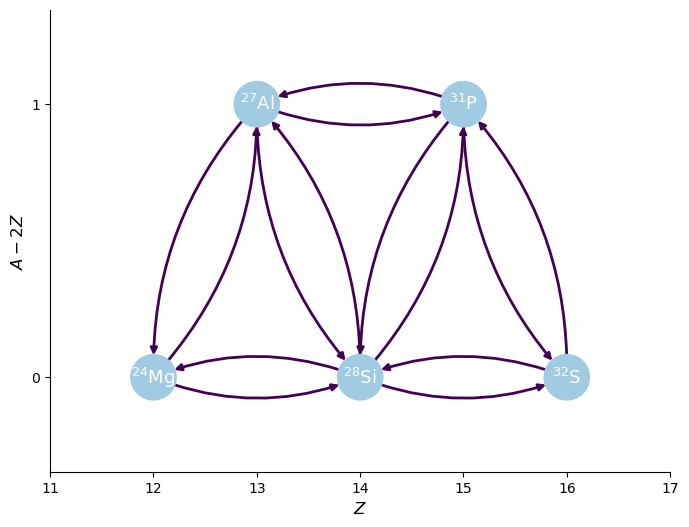

In [5]:
fig = pynet.plot(rotated=True, curved_edges=True)

In [6]:
pynet.make_ap_pg_approx()

using approximate rate Mg24 + He4 ‚ü∂ Si28 + ùõæ
using approximate rate Si28 ‚ü∂ Mg24 + He4
using approximate rate Si28 + He4 ‚ü∂ S32 + ùõæ
using approximate rate S32 ‚ü∂ Si28 + He4
removing rate Mg24 + He4 ‚ü∂ Si28 + ùõæ
removing rate Mg24 + He4 ‚ü∂ p + Al27
removing rate Al27 + p ‚ü∂ Si28 + ùõæ
removing rate Si28 ‚ü∂ He4 + Mg24
removing rate Si28 ‚ü∂ p + Al27
removing rate Al27 + p ‚ü∂ He4 + Mg24
removing rate Si28 + He4 ‚ü∂ S32 + ùõæ
removing rate Si28 + He4 ‚ü∂ p + P31
removing rate P31 + p ‚ü∂ S32 + ùõæ
removing rate S32 ‚ü∂ He4 + Si28
removing rate S32 ‚ü∂ p + P31
removing rate P31 + p ‚ü∂ He4 + Si28


In [7]:
pynet

P31 ‚ü∂ He4 + Al27
Al27 + He4 ‚ü∂ P31 + ùõæ
Mg24 + He4 ‚ü∂ Si28 + ùõæ
Si28 ‚ü∂ Mg24 + He4
Si28 + He4 ‚ü∂ S32 + ùõæ
S32 ‚ü∂ Si28 + He4

now remove the isolated Al27 and P31 nuclei

In [8]:
pynet.remove_nuclei(["al27", "p31"])

looking to remove P31 ‚ü∂ He4 + Al27
looking to remove Al27 + He4 ‚ü∂ P31 + ùõæ
looking to remove P31 ‚ü∂ He4 + Al27
looking to remove Al27 + He4 ‚ü∂ P31 + ùõæ


In [9]:
pynet

Mg24 + He4 ‚ü∂ Si28 + ùõæ
Si28 ‚ü∂ Mg24 + He4
Si28 + He4 ‚ü∂ S32 + ùõæ
S32 ‚ü∂ Si28 + He4

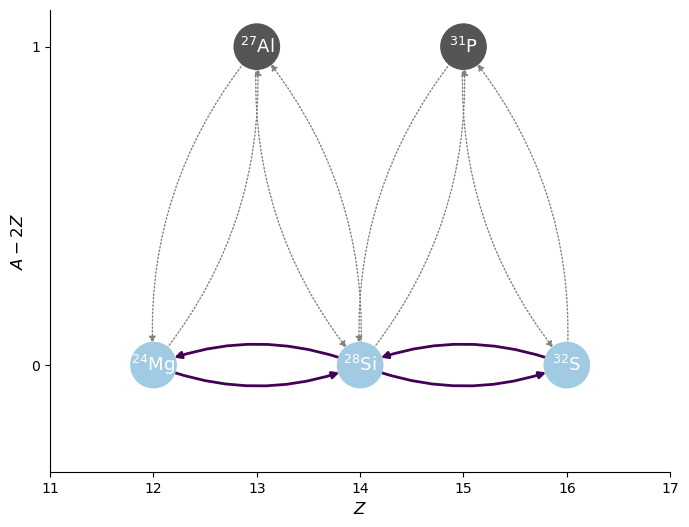

In [10]:
fig = pynet.plot(rotated=True, curved_edges=True)

In [11]:
pynet.write_network()

import numba
import numpy as np
from scipy import constants
from numba.experimental import jitclass

from pynucastro.rates import TableIndex, TableInterpolator, TabularRate, Tfactors
from pynucastro.screening import PlasmaState, ScreenFactors

jhe4 = 0
jmg24 = 1
jsi28 = 2
js32 = 3
nnuc = 4

A = np.zeros((nnuc), dtype=np.int32)

A[jhe4] = 4
A[jmg24] = 24
A[jsi28] = 28
A[js32] = 32

Z = np.zeros((nnuc), dtype=np.int32)

Z[jhe4] = 2
Z[jmg24] = 12
Z[jsi28] = 14
Z[js32] = 16

# masses in ergs
mass = np.zeros((nnuc), dtype=np.float64)

mass[jhe4] = 0.0059735574859708365
mass[jmg24] = 0.03579571000144743
mass[jsi28] = 0.041753271139658626
mass[js32] = 0.04771569725373347

names = []
names.append("He4")
names.append("Mg24")
names.append("Si28")
names.append("S32")

def to_composition(Y):
    """Convert an array of molar fractions to a Composition object."""
    from pynucastro import Composition, Nucleus
    nuclei = [Nucleus.from_cache(name) for name in names]
    comp = Composition(nuclei)
 